In [ ]:
!pip install opencv-python
!pip install matplotlib

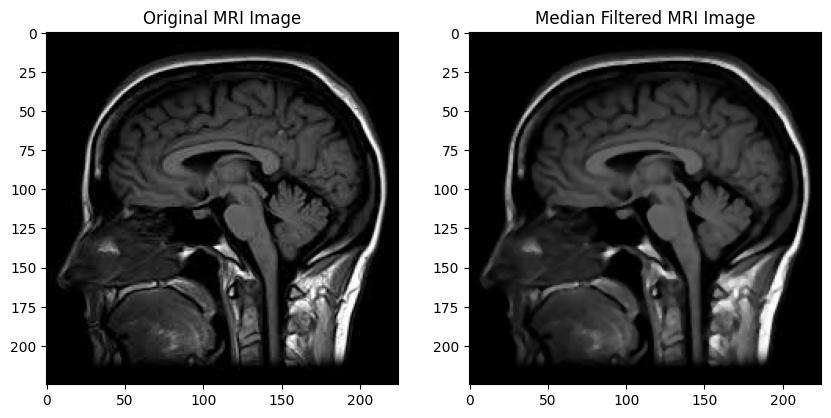

In [ ]:
import cv2
import numpy as np

# Load your MRI image here (replace 'your_mri_image.jpg' with your file path)
mri_image = cv2.imread('/images.jpeg', cv2.IMREAD_GRAYSCALE)

# Define the kernel size (should be odd)
kernel_size = 3

# Apply median filtering
median_filtered = cv2.medianBlur(mri_image, kernel_size)

# Display the original and filtered images (you can use matplotlib for visualization)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mri_image, cmap='gray')
plt.title('Original MRI Image')

plt.subplot(1, 2, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered MRI Image')

plt.show()

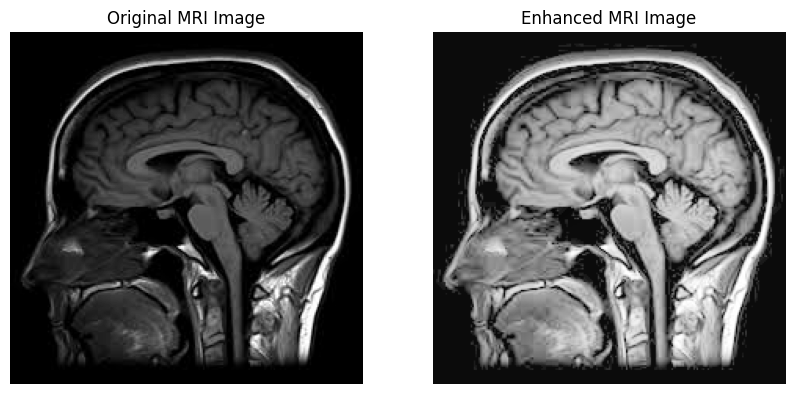

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure

# Load MRI image
image_path = "/images.jpeg"
mri_image = io.imread(image_path)

# Convert the image to grayscale if it's not already in grayscale
if mri_image.shape[-1] == 3:
    mri_image = color.rgb2gray(mri_image)

# Fuzzy contrast mapping function
def fuzzy_contrast_mapping(image):
    # Apply adaptive histogram equalization
    img_eq = exposure.equalize_adapthist(image)

    # Fuzzy contrast mapping
    fuzzy_mapping = img_eq ** 0.5

    return fuzzy_mapping

# Apply fuzzy contrast mapping
enhanced_image = fuzzy_contrast_mapping(mri_image)

# Display original and enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mri_image, cmap='gray')
plt.title('Original MRI Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced MRI Image')
plt.axis('off')

plt.show()

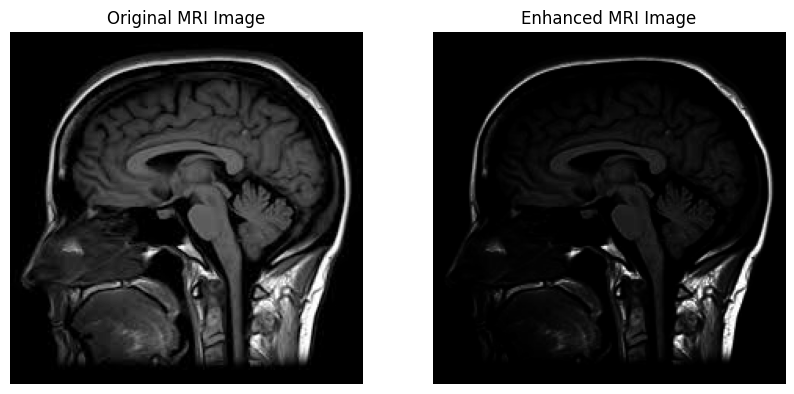

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load MRI image
image_path = "/images.jpeg"
mri_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Adaptive gamma correction function
def adaptive_gamma_correction(image, gamma=1.0):
    # Normalize the image to the range [0, 1]
    normalized_image = image / 255.0

    # Apply gamma correction
    gamma_corrected = np.power(normalized_image, gamma)

    # Rescale the image back to the range [0, 255]
    gamma_corrected = np.uint8(gamma_corrected * 255)

    return gamma_corrected

# Calculate adaptive gamma value based on image histogram
gamma = 1.0 + np.log(1 + np.mean(mri_image)) / np.log(1 + np.median(mri_image))

# Apply adaptive gamma correction
enhanced_image = adaptive_gamma_correction(mri_image, gamma)

# Display original and enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mri_image, cmap='gray')
plt.title('Original MRI Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced MRI Image')
plt.axis('off')

plt.show()

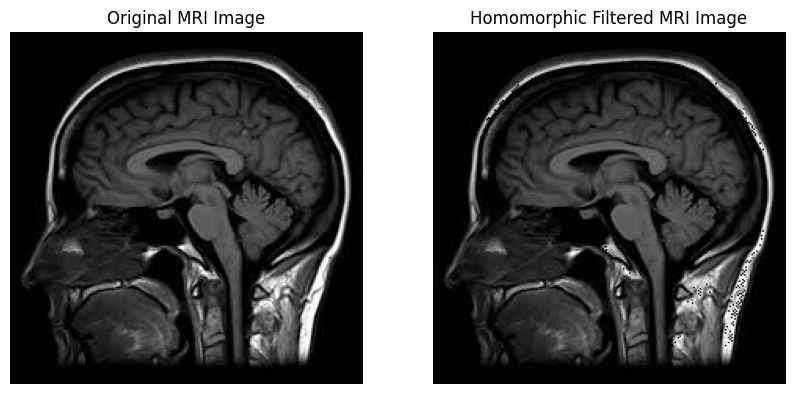

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load MRI image
image_path = "/images.jpeg"
mri_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert image to float32 for homomorphic filtering
mri_image_float32 = np.float32(mri_image)

# Apply log transform to enhance dynamic range
log_transformed_image = np.log1p(mri_image_float32)

# Perform Fourier transform
f = np.fft.fft2(log_transformed_image)

# Create a Gaussian high-pass filter
rows, cols = mri_image.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
r = 30  # Radius of the mask
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

# Apply the high-pass filter to the Fourier transform
fshift = f * mask

# Perform inverse Fourier transform
img_back = np.fft.ifft2(fshift)

# Take exponential to invert the log transform
homomorphic_filtered_image = np.expm1(np.real(img_back))

# Convert back to uint8 for displaying the image
homomorphic_filtered_image = np.uint8(homomorphic_filtered_image)

# Display original and enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mri_image, cmap='gray')
plt.title('Original MRI Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(homomorphic_filtered_image, cmap='gray')
plt.title('Homomorphic Filtered MRI Image')
plt.axis('off')

plt.show()

/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:492: UserWarning: Downcasting int64 to uint16 without scaling because max value 0 fits in uint16
  return _convert(image, np.uint16, force_copy)


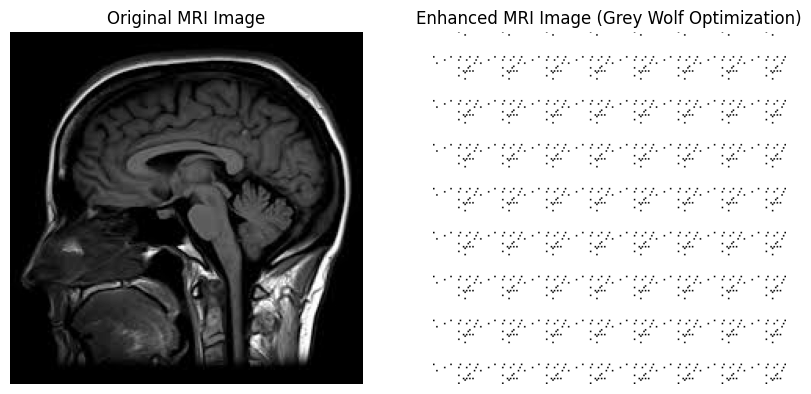

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure

# Load MRI image
image_path = "/images.jpeg"
mri_image = io.imread(image_path)

# Convert the image to grayscale if it's not already in grayscale
if mri_image.shape[-1] == 3:
    mri_image = color.rgb2gray(mri_image)

# Define Grey Wolf Optimization function for image enhancement
def grey_wolf_optimization(image, num_iterations, num_wolves=5):
    # Initialize grey wolves randomly within the image intensity range
    wolves = np.random.randint(0, 256, size=(num_wolves, image.shape[0], image.shape[1]))
    best_wolf = None
    best_fitness = float('inf')

    for iteration in range(num_iterations):
        # Evaluate fitness for each wolf
        fitness_values = np.abs(wolves - image)
        fitness = np.sum(fitness_values, axis=(1, 2))

        # Find the best wolf
        min_fitness_index = np.argmin(fitness)
        if fitness[min_fitness_index] < best_fitness:
            best_fitness = fitness[min_fitness_index]
            best_wolf = wolves[min_fitness_index]

        # Update wolf positions using hunting mechanism
        a = 2 - iteration * (2 / num_iterations)  # Alpha parameter
        for i in range(num_wolves):
            r1, r2 = np.random.rand(2)
            A1 = 2 * a * r1 - a
            C1 = 2 * r2
            D_alpha = np.abs(C1 * best_wolf - wolves[i])
            updated_wolf = best_wolf - A1 * D_alpha
            wolves[i] = np.clip(updated_wolf, 0, 255)  # Ensure intensity values are within valid range

    return best_wolf

# Apply Grey Wolf Optimization for image enhancement
num_iterations = 100
enhanced_image = grey_wolf_optimization(mri_image, num_iterations)

# Apply adaptive histogram equalization for better visualization
enhanced_image = exposure.equalize_adapthist(enhanced_image)

# Display original and enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mri_image, cmap='gray')
plt.title('Original MRI Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced MRI Image (Grey Wolf Optimization)')
plt.axis('off')

plt.show()